In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve




In [2]:
# Load the dataset

data = pd.read_csv("covtype.csv")

# Display the first few rows of the dataframe
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [4]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values if any
missing_values[missing_values > 0]

Series([], dtype: int64)

In [5]:
# Checking the data types of all columns
data_types = data.dtypes

# Display the data types
data_types

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

# Preprocessing

In [6]:

label_encoder = LabelEncoder()
data['Cover_Type'] = label_encoder.fit_transform(data['Cover_Type'])
data.head()                                                

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,4


In [7]:

# Initialize the StandardScaler
scalar = StandardScaler()
num_data = data[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]]
cat_data = data.drop(["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"],axis=1)
scaled_data = scalar.fit_transform(num_data)
num_data1 = pd.DataFrame(scaled_data,columns=num_data.columns)
scaled_data = pd.concat([num_data1,cat_data],axis=1)

In [8]:
scaled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,3.246283,221,232,148,...,0,0,0,0,0,0,0,0,0,4
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,3.205504,220,235,151,...,0,0,0,0,0,0,0,0,0,4
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,3.126965,234,238,135,...,0,0,0,0,0,0,0,0,0,1
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,3.194931,238,238,122,...,0,0,0,0,0,0,0,0,0,1
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,3.165479,220,234,150,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,-0.863386,240,237,118,...,0,0,0,0,0,0,0,0,0,2
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,-0.857345,240,237,119,...,0,0,0,0,0,0,0,0,0,2
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,-0.850548,236,241,130,...,0,0,0,0,0,0,0,0,0,2
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,-0.842997,230,245,143,...,0,0,0,0,0,0,0,0,0,2


# Visualization

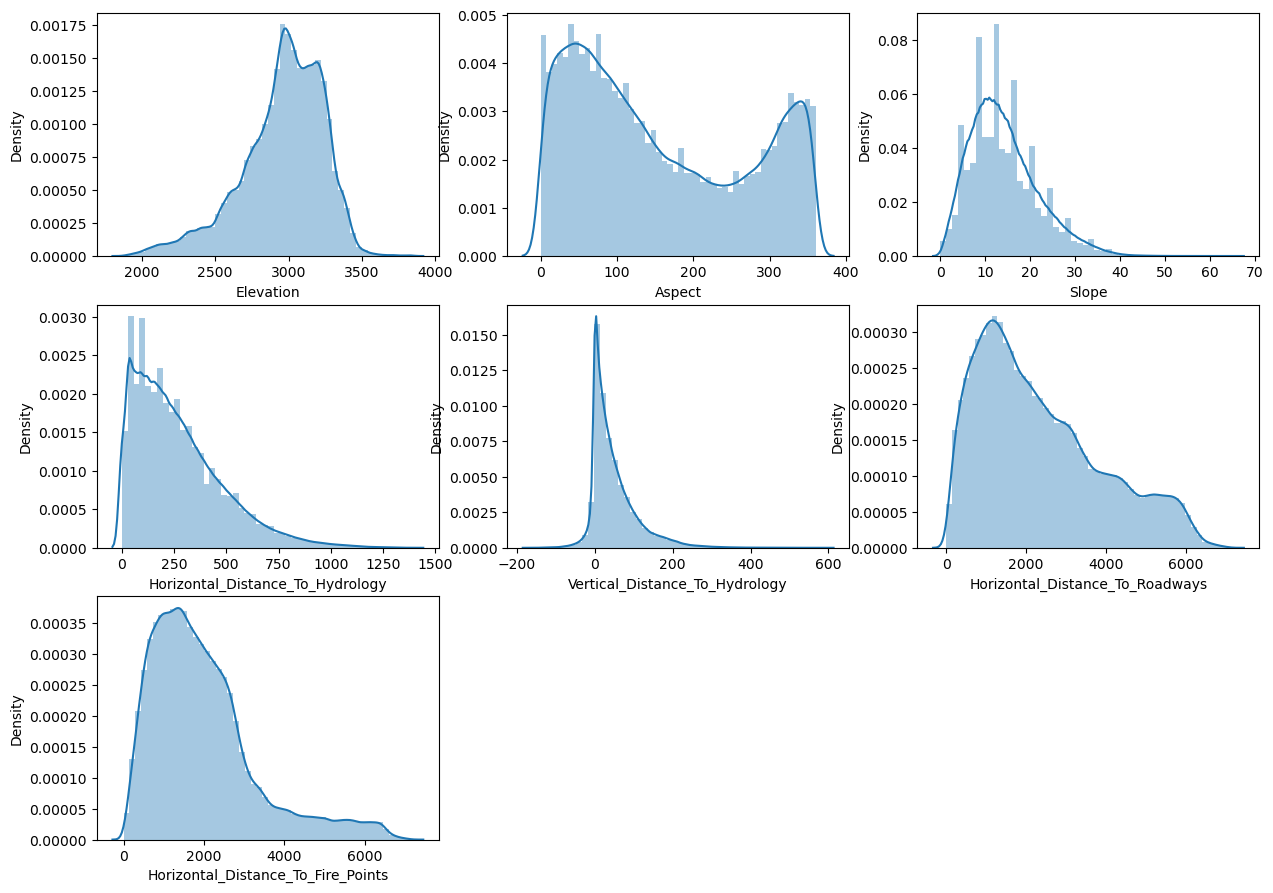

In [9]:

plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1

for column in num_data:
    ax = plt.subplot(16,3,plotnumber)
    sns.distplot(num_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# SKEWNESS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Elevation'),
  Text(1, 0, 'Aspect'),
  Text(2, 0, 'Slope'),
  Text(3, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(4, 0, 'Vertical_Distance_To_Hydrology'),
  Text(5, 0, 'Horizontal_Distance_To_Roadways'),
  Text(6, 0, 'Hillshade_9am'),
  Text(7, 0, 'Hillshade_Noon'),
  Text(8, 0, 'Hillshade_3pm'),
  Text(9, 0, 'Horizontal_Distance_To_Fire_Points'),
  Text(10, 0, 'Wilderness_Area1'),
  Text(11, 0, 'Wilderness_Area2'),
  Text(12, 0, 'Wilderness_Area3'),
  Text(13, 0, 'Wilderness_Area4'),
  Text(14, 0, 'Soil_Type1'),
  Text(15, 0, 'Soil_Type2'),
  Text(16, 0, 'Soil_Type3'),
  Text(17, 0, 'Soil_Type4'),
  Text(18, 0, 'Soil_Type5'),
  Text(19, 0, 'Soil_Type6'),
  Text(20, 0, 'Soil_Type7'),
  Text(21, 0, 'Soil_Type8'),
  Text(

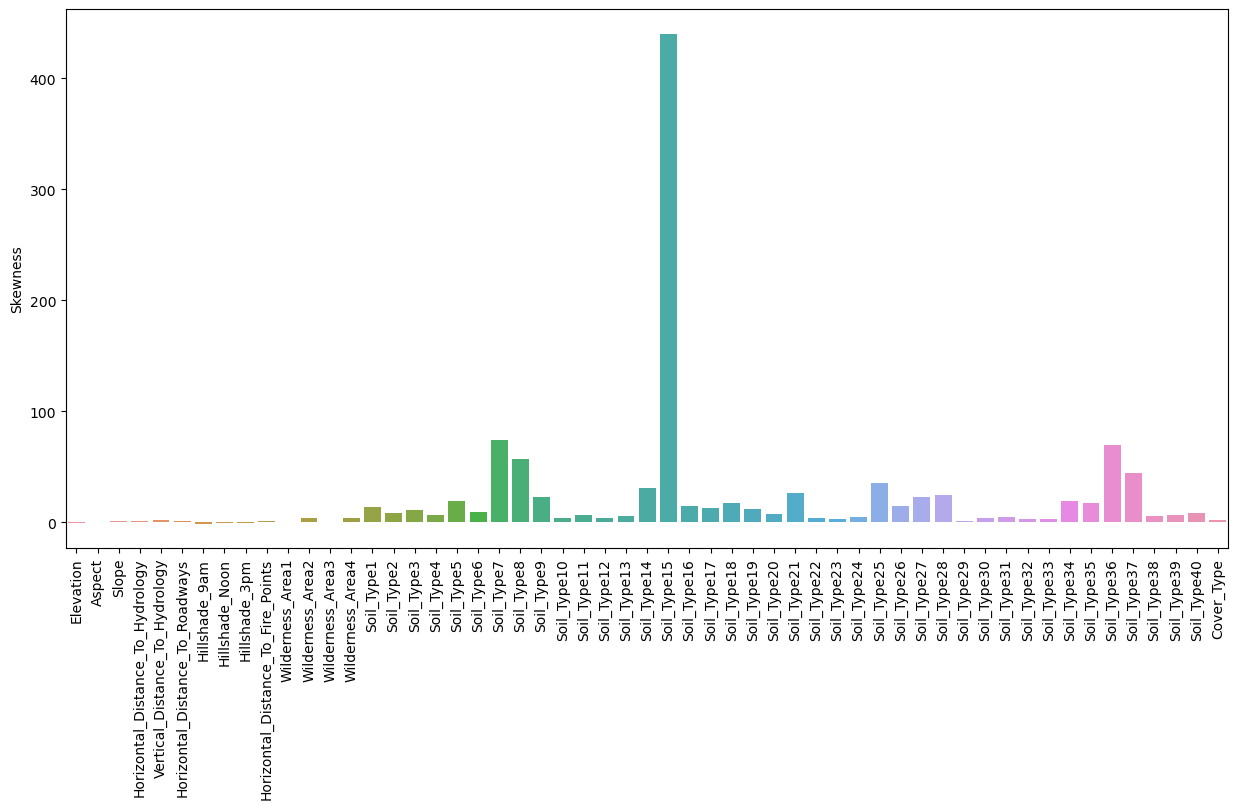

In [10]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

<Axes: xlabel='Cover_Type', ylabel='Size'>

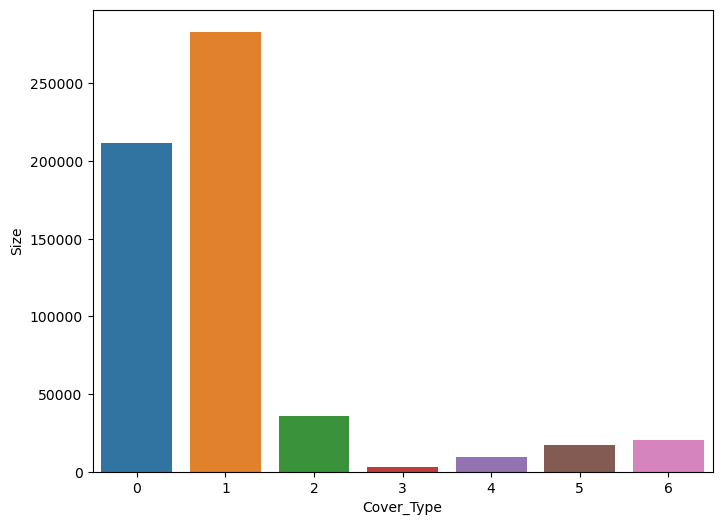

In [11]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

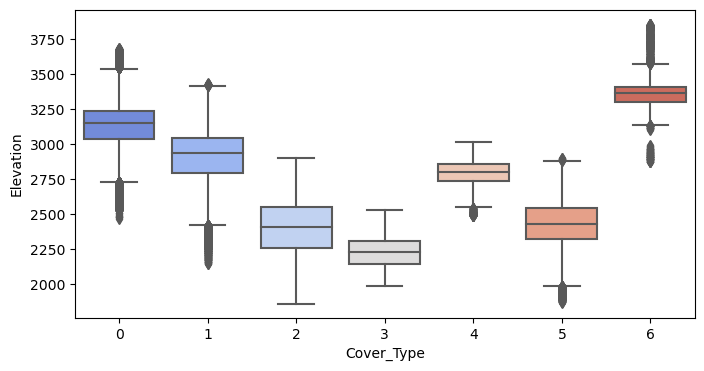

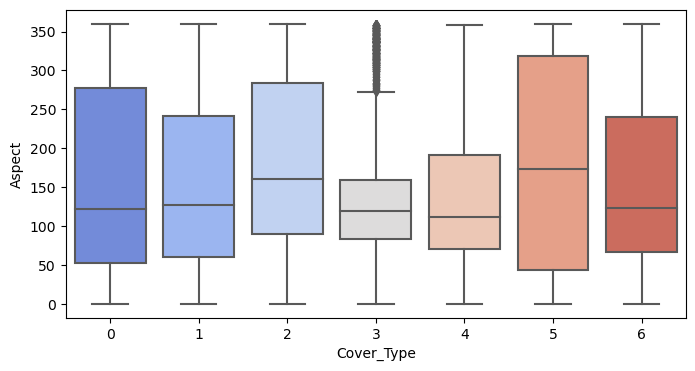

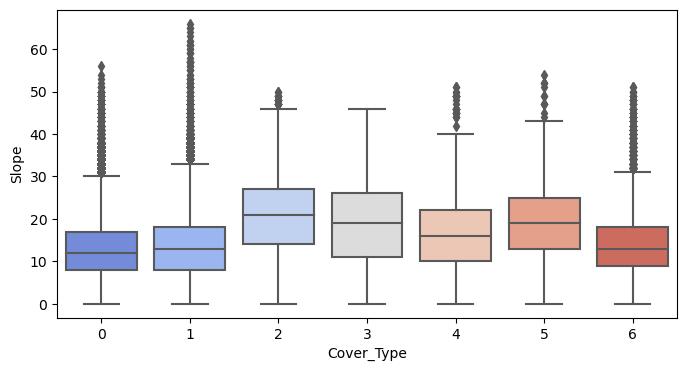

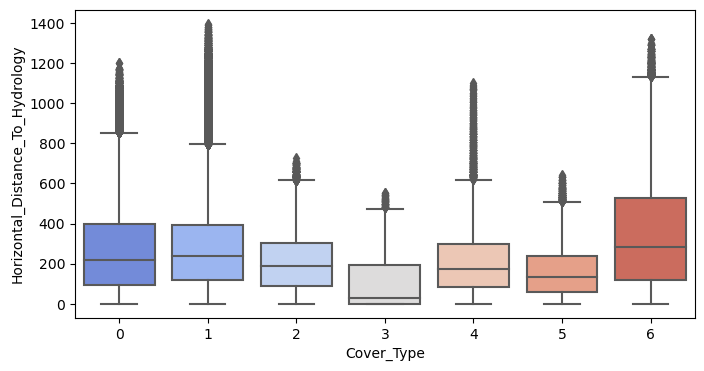

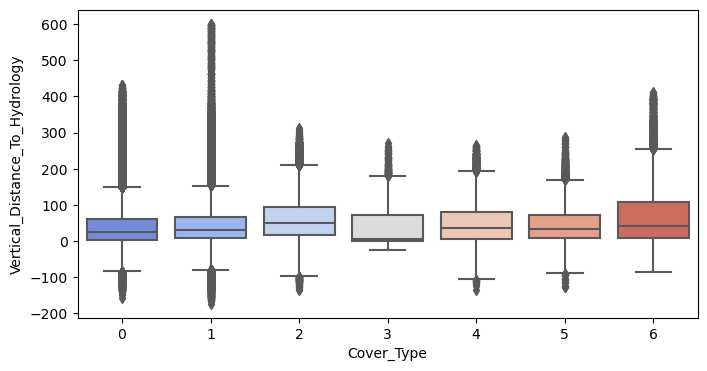

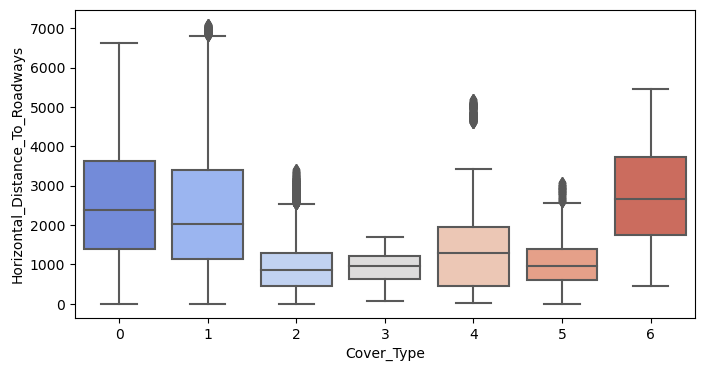

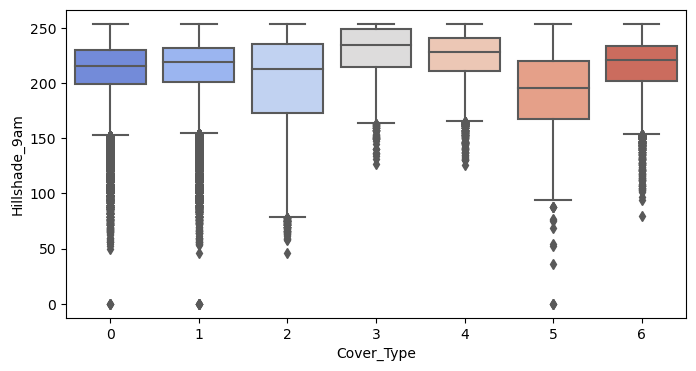

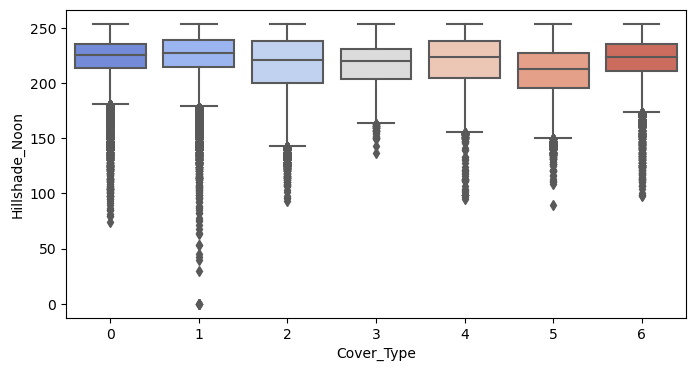

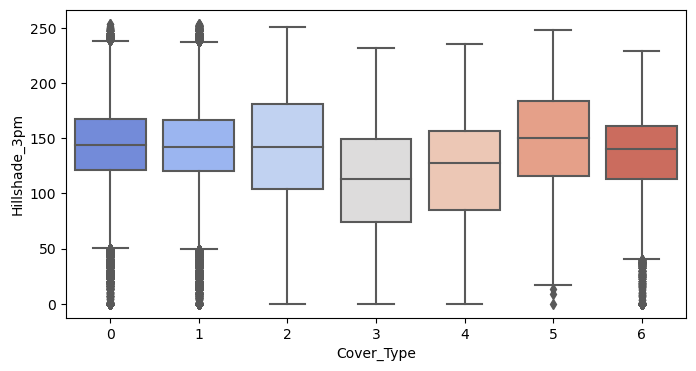

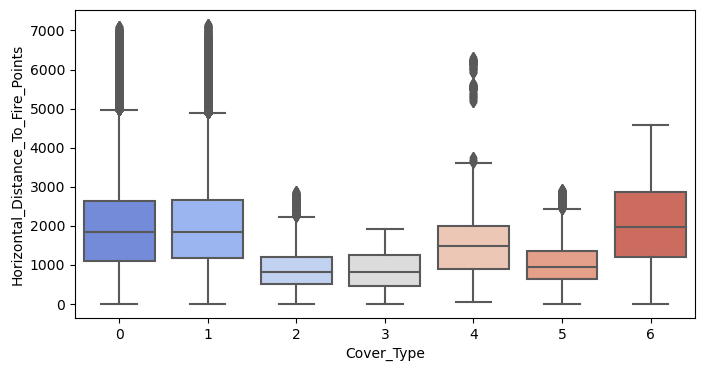

In [12]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

# Heat_Map

<Axes: >

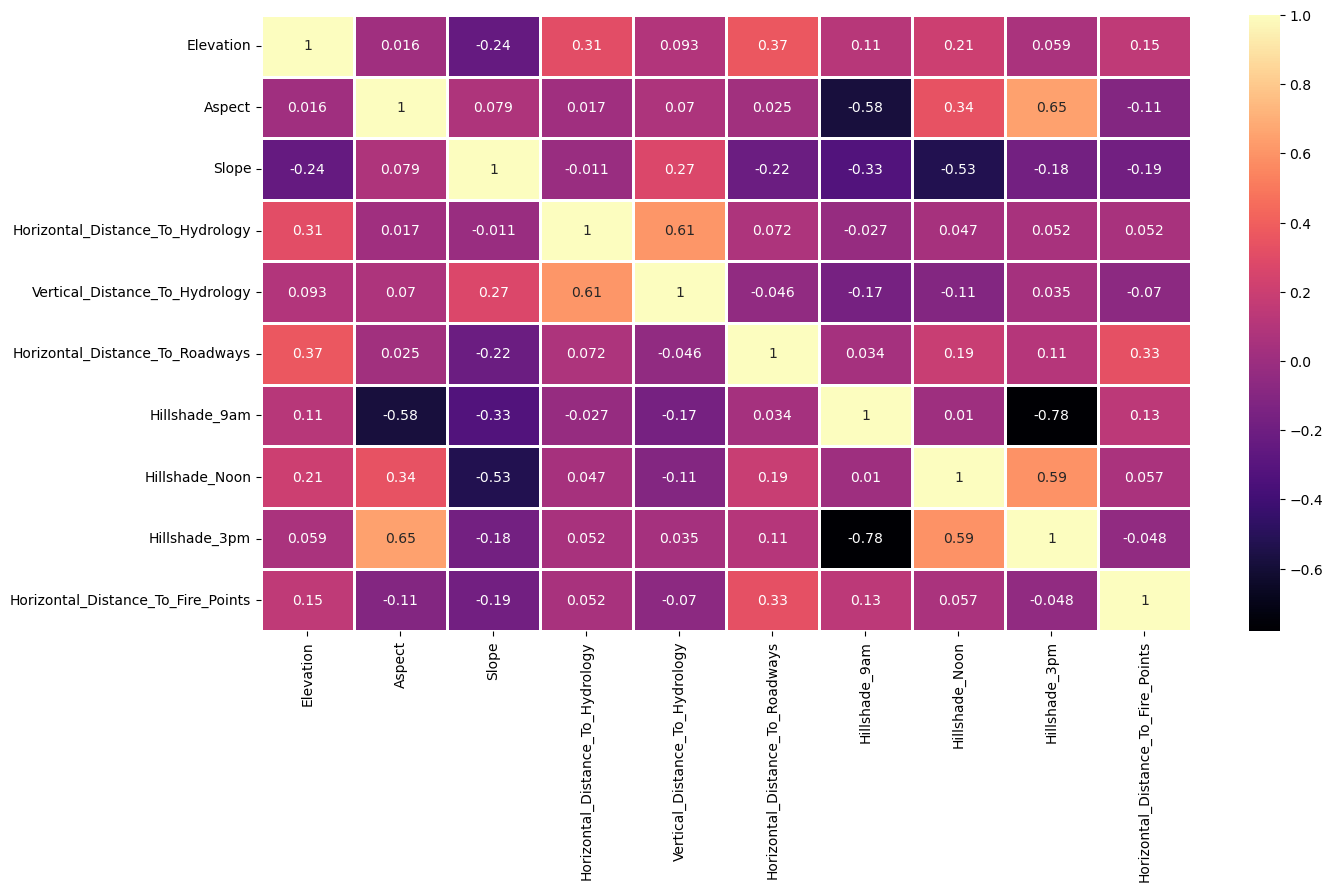

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

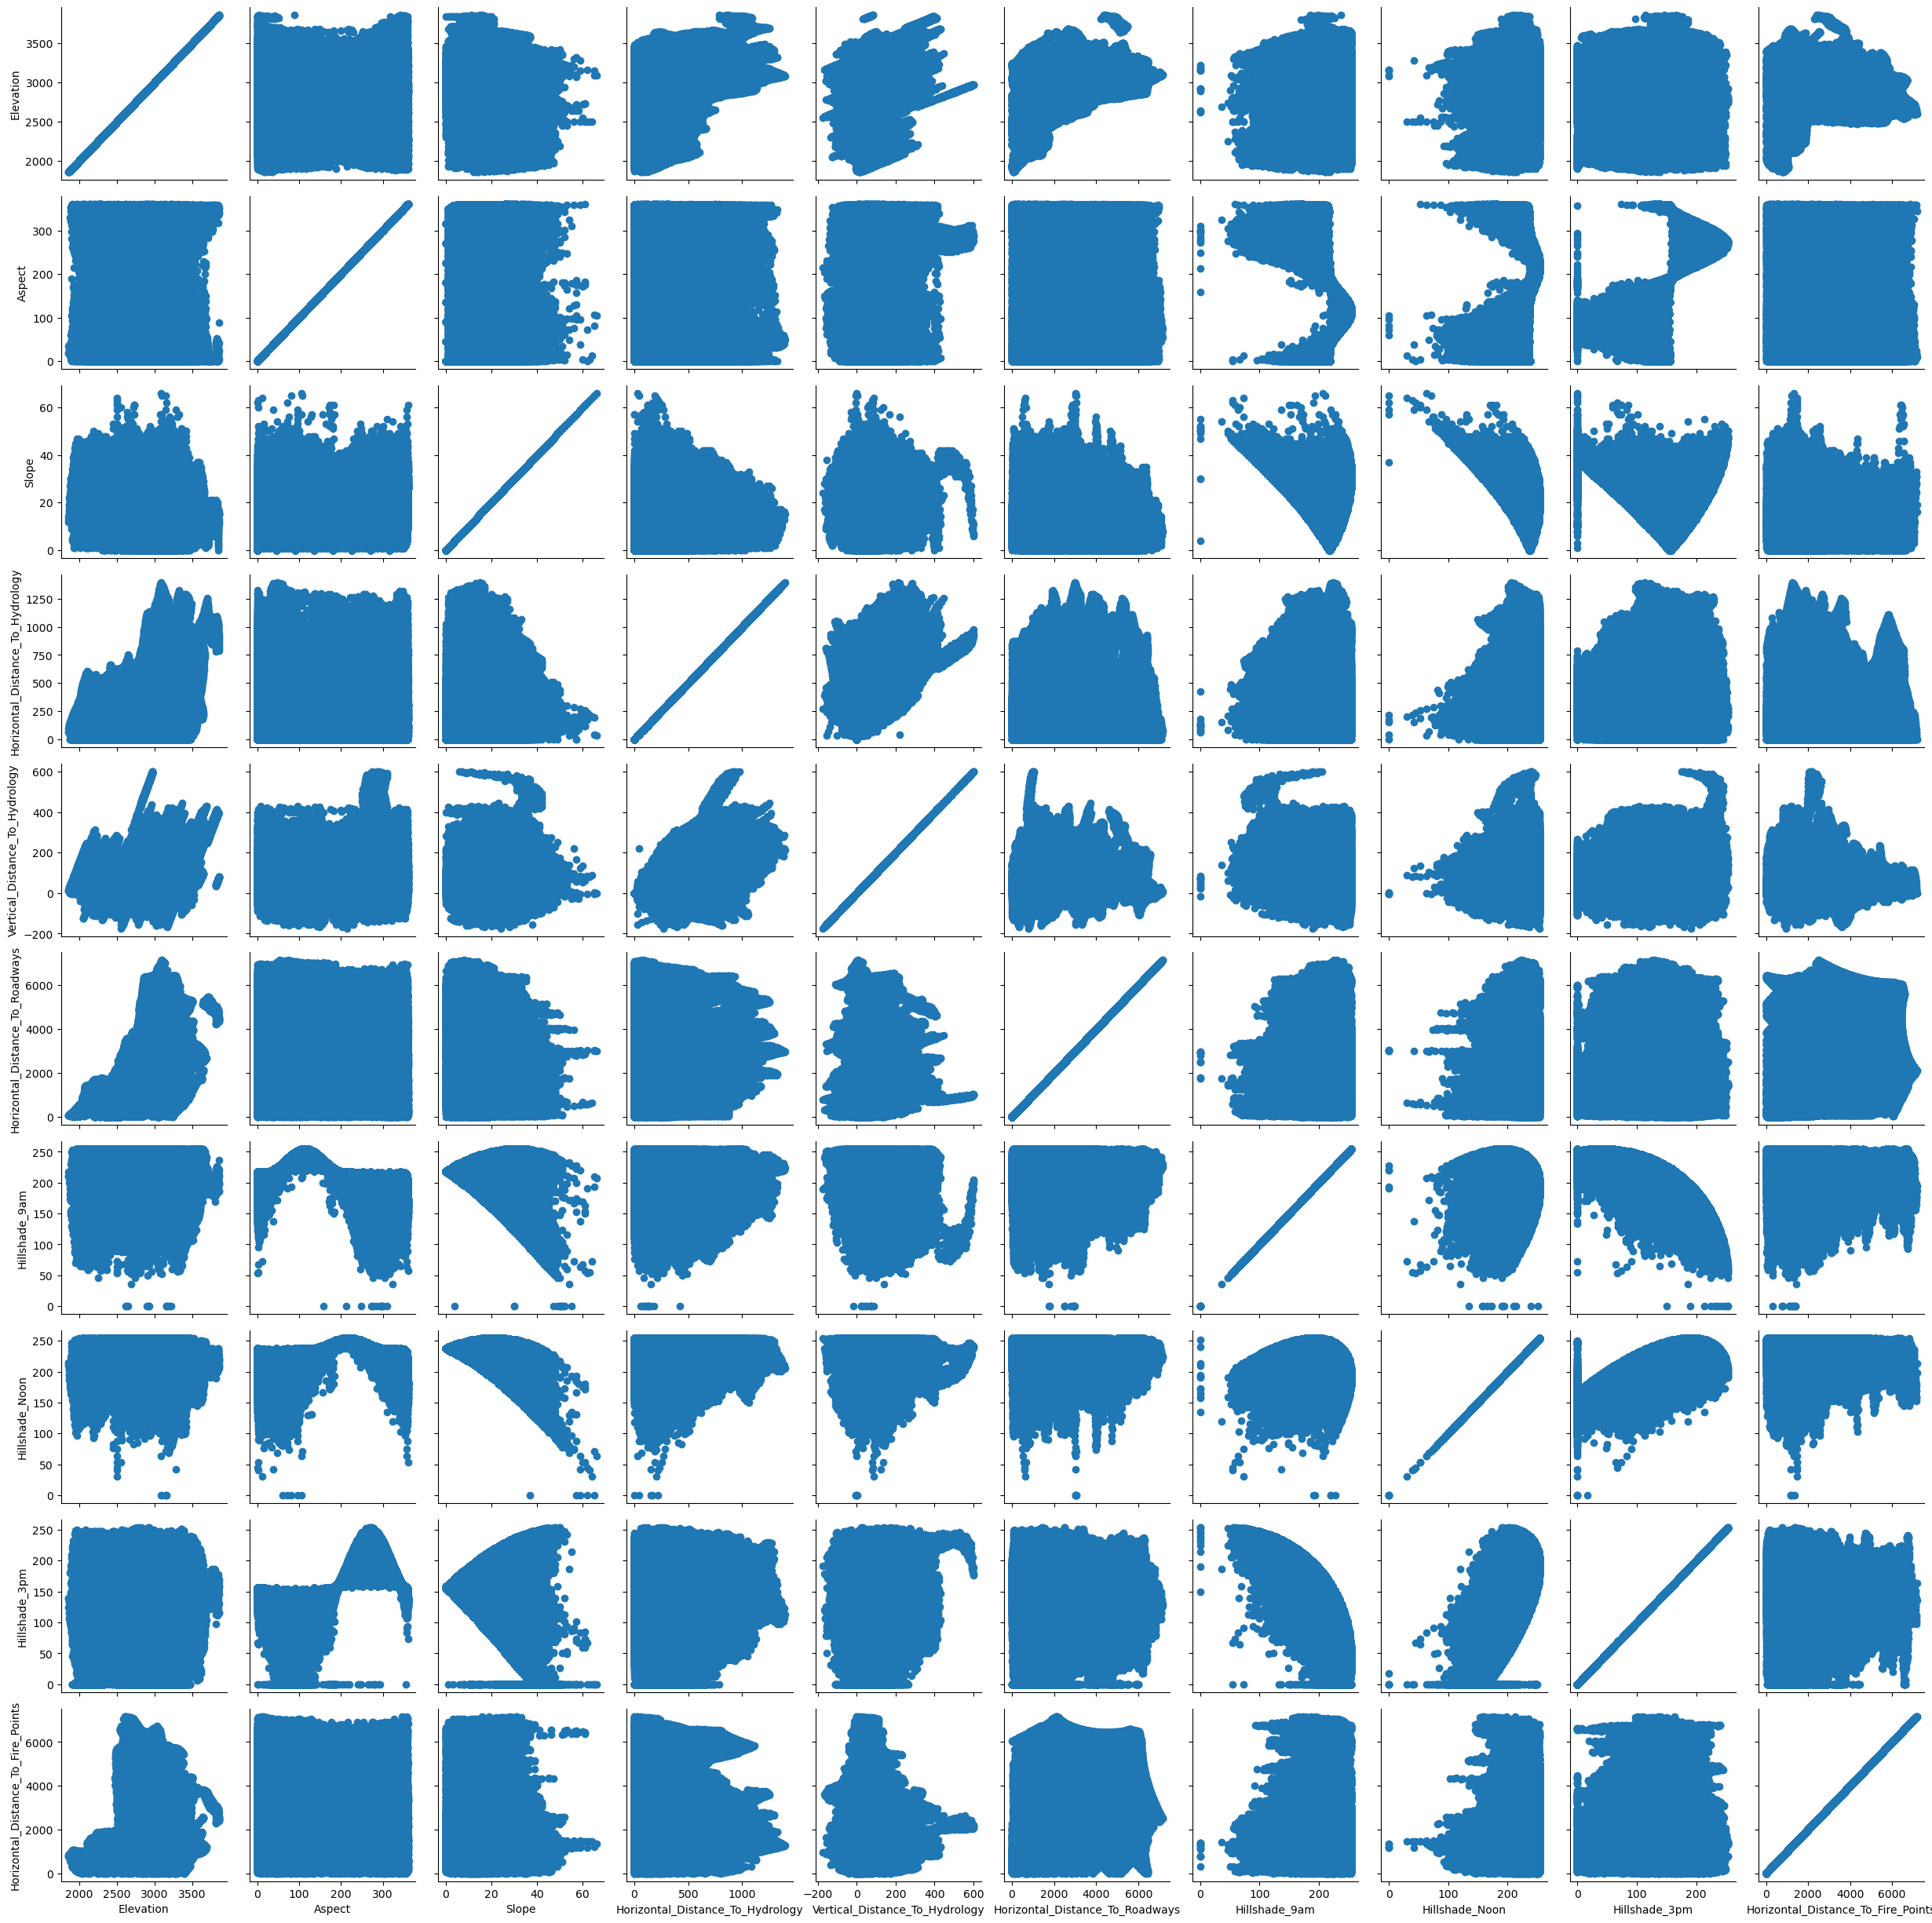

In [14]:
g = sns.PairGrid(cont_data)
g.map(plt.scatter)

# FEATURE SELECTION:

In [15]:
# Define the features and the target variable
X = scaled_data.drop("Cover_Type", axis=1)
y = scaled_data["Cover_Type"]  
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[1.97144712e-01 5.18871160e-02 3.70769031e-02 6.44622303e-02
 5.90971559e-02 1.11675810e-01 1.05580456e-01 4.32182479e-02
 4.55401157e-02 4.28528903e-02 1.01661690e-02 6.17340428e-03
 1.20322215e-02 3.81780996e-02 1.24799663e-03 1.02230163e-02
 2.65551480e-03 1.40352669e-02 4.89168713e-04 2.35424129e-03
 3.98270461e-05 5.27561350e-05 2.41154735e-04 1.28922987e-02
 3.97785603e-03 1.59539161e-02 5.19827292e-03 5.72074081e-04
 4.88855973e-06 9.24287696e-04 1.97502341e-03 5.97361626e-04
 1.15245762e-03 2.06697283e-03 1.19988454e-03 1.94017925e-02
 1.12210823e-02 4.26131188e-03 2.44497505e-04 9.08861180e-04
 8.06523091e-04 3.49842054e-04 5.50786070e-03 4.11405992e-03
 3.15122436e-03 4.08766075e-03 3.61600117e-03 9.82605610e-04
 2.36069977e-03 1.16634831e-04 8.16062448e-04 1.33525394e-02
 1.37797192e-02 7.98125262e-03]


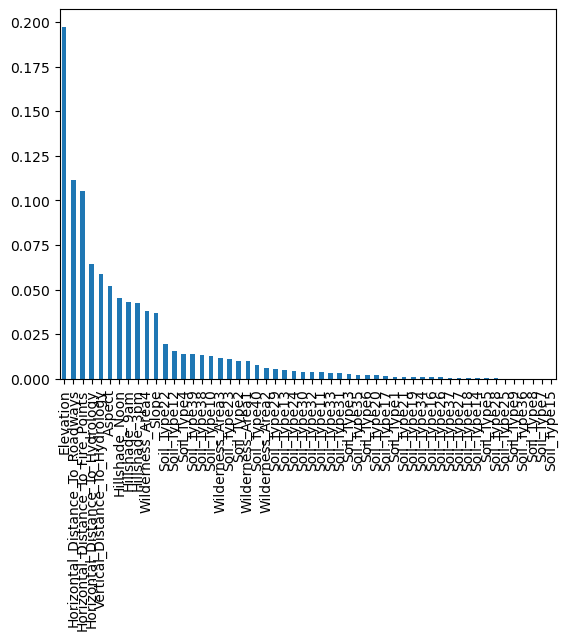

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(54).plot(kind='bar')
plt.show()

In [17]:
top_9_features = feat_importances.nlargest(54)
selected_columns = data[top_9_features.index]
selected_columns

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Hillshade_3pm,Wilderness_Area4,...,Soil_Type18,Soil_Type14,Soil_Type5,Soil_Type28,Soil_Type25,Soil_Type9,Soil_Type36,Soil_Type8,Soil_Type7,Soil_Type15
0,2596,510,6279,258,0,51,232,221,148,0,...,0,0,0,0,0,0,0,0,0,0
1,2590,390,6225,212,-6,56,235,220,151,0,...,0,0,0,0,0,0,0,0,0,0
2,2804,3180,6121,268,65,139,238,234,135,0,...,0,0,0,0,0,0,0,0,0,0
3,2785,3090,6211,242,118,155,238,238,122,0,...,0,0,0,0,0,0,0,0,0,0
4,2595,391,6172,153,-1,45,234,220,150,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,153,237,240,118,0,...,0,0,0,0,0,0,0,0,0,0
581008,2391,95,845,67,12,152,237,240,119,0,...,0,0,0,0,0,0,0,0,0,0
581009,2386,90,854,60,7,159,241,236,130,0,...,0,0,0,0,0,0,0,0,0,0
581010,2384,90,864,60,5,170,245,230,143,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X=scaled_data.drop("Cover_Type",axis=1)
y=scaled_data["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shape of the resulting sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((464809, 54), (116203, 54), (464809,), (116203,))

# XGBoost

In [19]:

import xgboost as xgb
tree1= xgb.XGBClassifier()
tree1.fit(X_train, y_train)
y_pred0 = tree1.predict(X_test)



In [20]:
from sklearn import metrics
report0=classification_report(y_test,y_pred0)
print(report0)


              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.90      0.85      0.88       526
           4       0.88      0.58      0.70      1995
           5       0.85      0.81      0.83      3489
           6       0.94      0.91      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



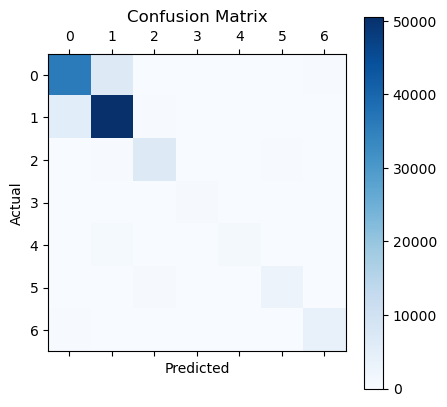

In [21]:
# Create the confusion matrix
matrix = confusion_matrix(y_test,y_pred0)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [22]:


# Initialize Gaussian Naive Bayes since our features are continuous after standardization
nb_model = RandomForestClassifier()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = nb_model.predict(X_test)



In [23]:

report = classification_report(y_test,y_pred1)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.95      7121
           3       0.91      0.85      0.88       526
           4       0.94      0.77      0.85      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.95      0.95      0.95    116203



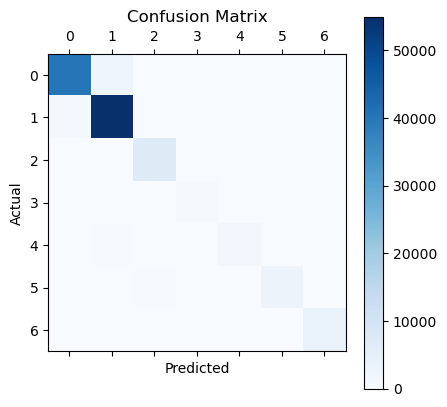

In [24]:
# Create the confusion matrix
matrix = confusion_matrix(y_test,y_pred1)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [25]:


# Initialize Gaussian Naive Bayes since our features are continuous after standardization
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train,y_train)

# Make predictions on the test set
y_pred2 = knn.predict(X_test)




In [26]:
report1=classification_report(y_test,y_pred2)
print(report1)


              precision    recall  f1-score   support

           0       0.71      0.71      0.71     42557
           1       0.74      0.80      0.77     56500
           2       0.67      0.69      0.68      7121
           3       0.53      0.24      0.33       526
           4       0.57      0.20      0.30      1995
           5       0.43      0.25      0.32      3489
           6       0.82      0.44      0.58      4015

    accuracy                           0.72    116203
   macro avg       0.64      0.48      0.52    116203
weighted avg       0.71      0.72      0.71    116203



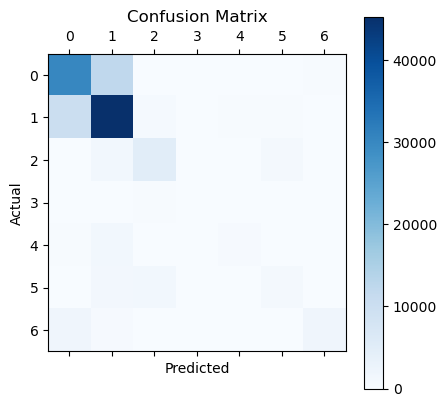

In [27]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred2)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# LogisticRegression

In [28]:

# Create the logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_pred3 = model.predict(X_test)



In [29]:
report2=classification_report(y_test,y_pred3)
print(report2)

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     42557
           1       0.66      0.76      0.71     56500
           2       0.58      0.20      0.29      7121
           3       0.00      0.00      0.00       526
           4       0.07      0.00      0.01      1995
           5       0.23      0.16      0.19      3489
           6       0.77      0.00      0.00      4015

    accuracy                           0.64    116203
   macro avg       0.42      0.26      0.27    116203
weighted avg       0.63      0.64      0.61    116203



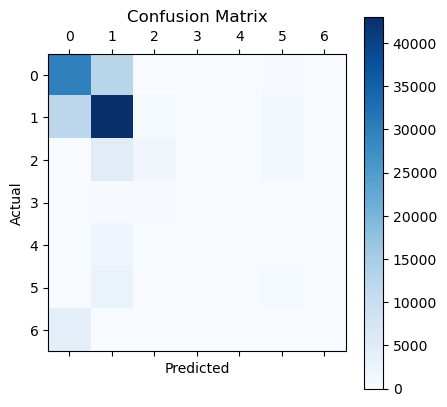

In [30]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred3)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [31]:

# Initialize and train the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred4 = tree_classifier.predict(X_test)



In [32]:
report=classification_report(y_test,y_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.69      0.67     42557
           1       0.73      0.73      0.73     56500
           2       0.58      0.80      0.67      7121
           3       0.35      0.39      0.37       526
           4       0.00      0.00      0.00      1995
           5       0.00      0.00      0.00      3489
           6       0.53      0.47      0.50      4015

    accuracy                           0.68    116203
   macro avg       0.41      0.44      0.42    116203
weighted avg       0.65      0.68      0.66    116203



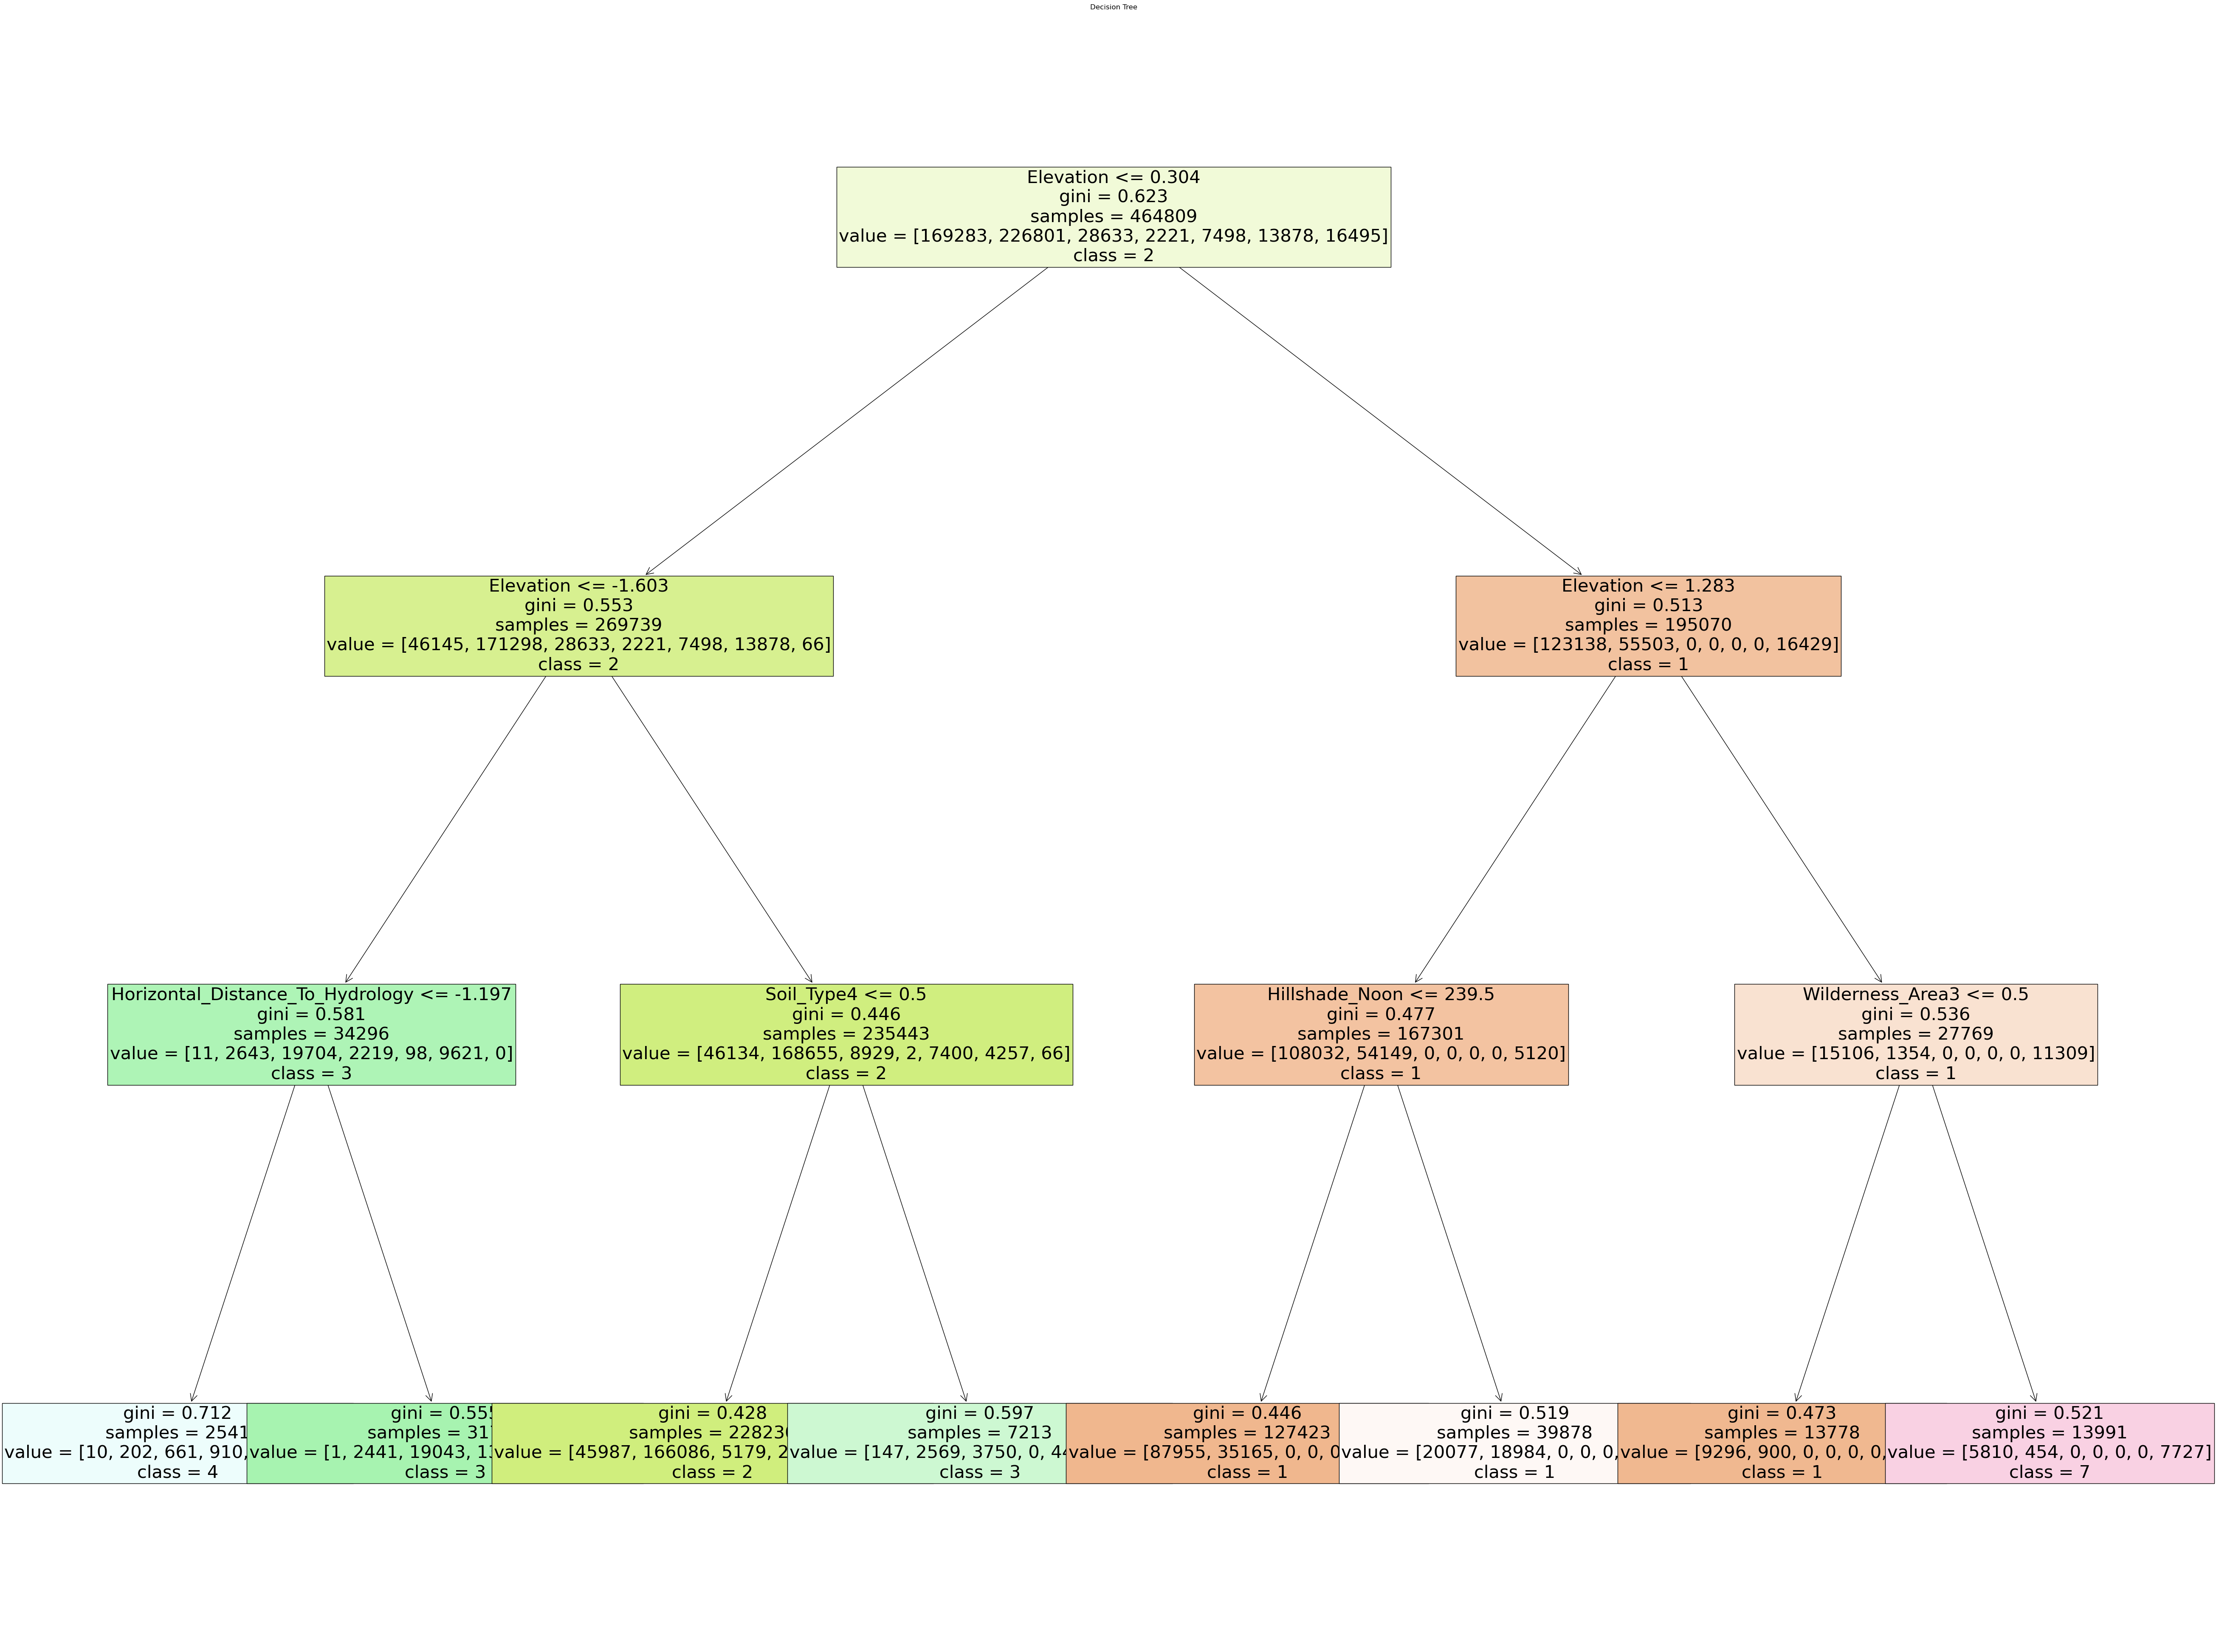

In [33]:

plt.figure(figsize=(65,50))
plot_tree(tree_classifier, filled=True, feature_names=X.columns.tolist(), class_names=['1','2','3','4','5','6','7'], fontsize=30)
plt.title("Decision Tree")
plt.show()

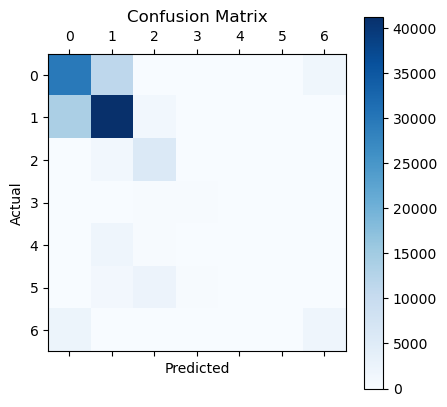

In [34]:

# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred4)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Loss Curve

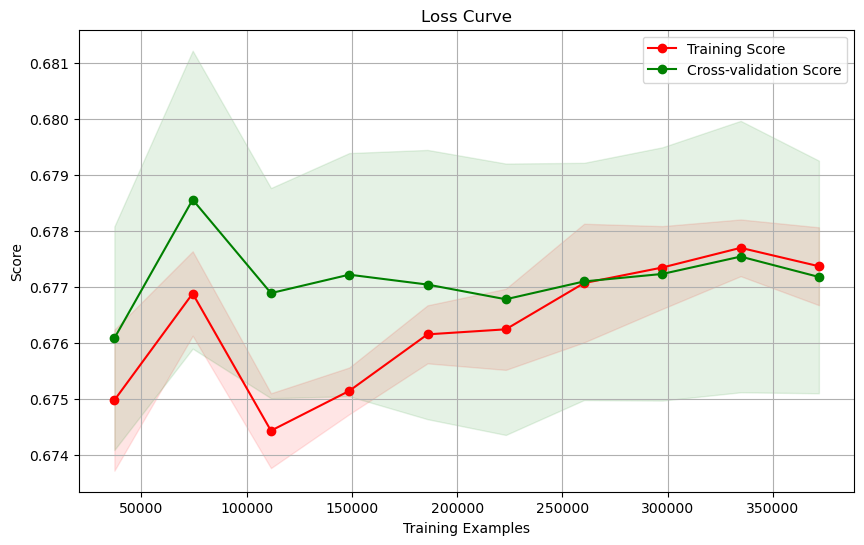

In [35]:
#for decision Tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(tree_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

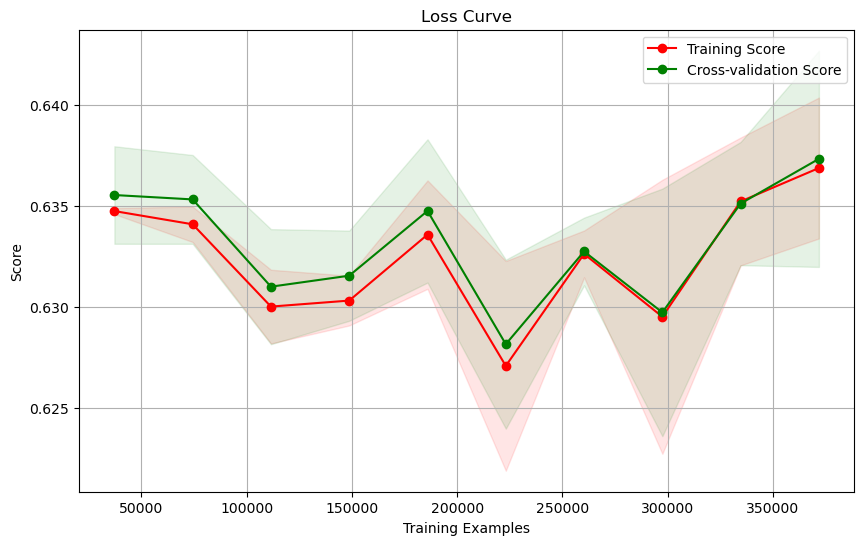

In [36]:
#for Logistic regression



train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

In [ ]:
#for knn


train_sizes, train_scores, test_scores = learning_curve(knn , X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

In [ ]:
#for random_forest


train_sizes, train_scores, test_scores = learning_curve(nb_model , X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

In [ ]:
#for xgboosting


train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

# Error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and 3 subplots
fig, axs = plt.subplots(3)

# Plot the distributions
sns.distplot(y_test-y_pred0, ax=axs[0],kde=False)
axs[0].set_title('xgboost')

sns.distplot(y_test-y_pred1, ax=axs[0],kde=False)
axs[1].set_title('randomforest')

sns.distplot(y_test-y_pred2, ax=axs[1],kde=False)
axs[2].set_title('KNN')

sns.distplot(y_test-y_pred3, ax=axs[2],kde=False)
axs[3].set_title('Logistic_Regression')

sns.distplot(y_test-y_pred4, ax=axs[0],kde=False)
axs[4].set_title('Decision_tree')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Residual vs. Fitted Values for Prediction 1
axs[0].scatter(y_pred0,y_test-y_pred0 )
axs[0].set_title('randomforestregressor')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residual')


# Scatter plot for Residual vs. Fitted Values for Prediction 1
axs[1].scatter(y_pred1,y_test-y_pred1 )
axs[1].set_title('randomforestregressor')
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 2
axs[2].scatter(y_pred2, y_test-y_pred2)
axs[2].set_title('KNeighborsRegressor')
axs[2].set_xlabel('Fitted Values')
axs[2].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 3
axs[3].scatter(y_pred3, y_test-y_pred3)
axs[3].set_title('XGBRegressor')
axs[3].set_xlabel('Fitted Values')
axs[3].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 1
axs[4].scatter(y_pred4,y_test-y_pred4 )
axs[4].set_title('randomforestregressor')
axs[4].set_xlabel('Fitted Values')
axs[4].set_ylabel('Residual')


# Show the plot
plt.tight_layout()
plt.show()